In [2]:
# Import Libraries
import pandas as pd
import numpy as np

In [3]:
# Loading the dataset into a pandas dataframe
df = pd.read_csv("/Users/pookay/Desktop/Telco_Customer_Churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
# Displaying the first 5 rows of data
print(" First 5 rows of the dataframe")
df.head()

 First 5 rows of the dataframe


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Summary of the dataframe
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [6]:
# Converting total charges to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(f" Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

 Missing values in TotalCharges: 11


In [9]:
# Dropping null values
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

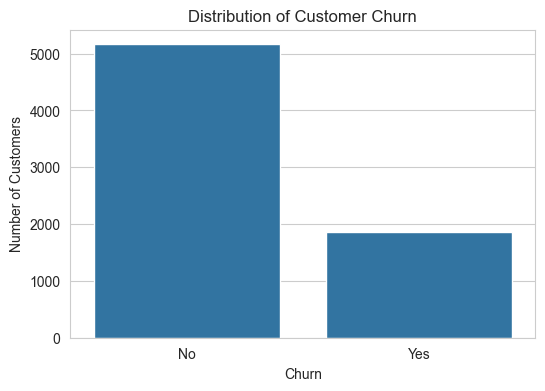

Customer Churn Count:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Plot to show distribution of chur
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

print("Customer Churn Count:")
print(df['Churn'].value_counts())

In [12]:
contract_churn_counts = df.groupby(['Churn', 'Contract']).size().unstack(fill_value=0)
contract_churn_counts

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


In [19]:
churn_percentages_by_contract = contract_churn_counts.div(contract_churn_counts.sum(axis=1),axis=0) * 100
churn_percentages_by_contract

Contract,Month-to-month,One year,Two year
Churn,,,
No,42.998257,25.295371,31.706372
Yes,88.550027,8.881755,2.568218


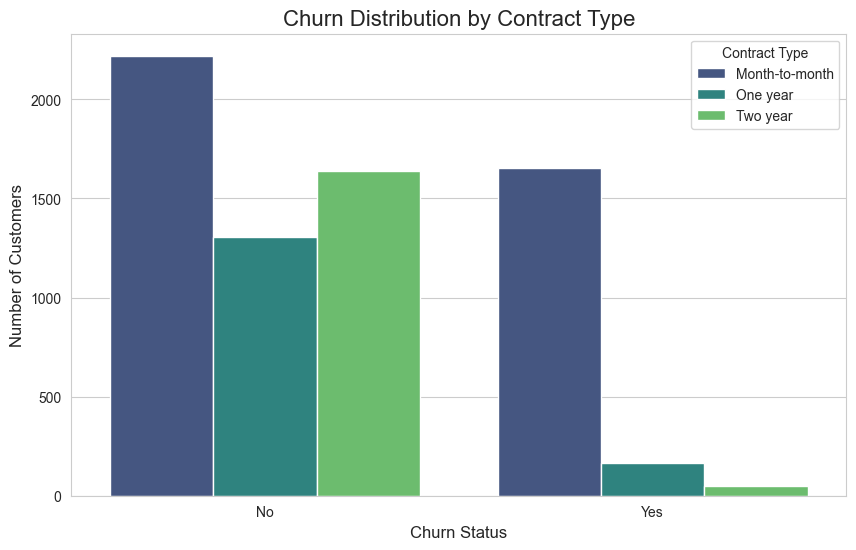

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='Contract', data=df, palette='viridis')

plt.title('Churn Distribution by Contract Type', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Contract Type')

plt.show()

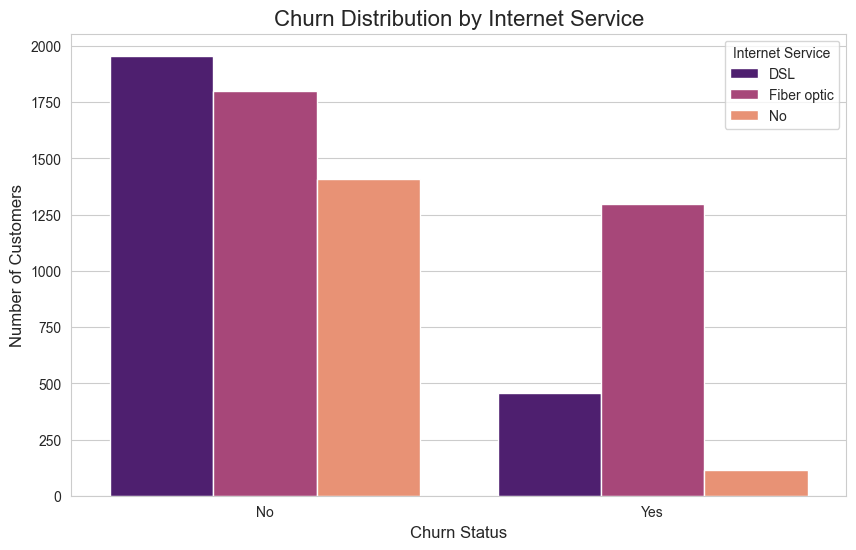

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='InternetService', data=df, palette='magma')

plt.title('Churn Distribution by Internet Service', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Internet Service')

plt.show()

In [23]:
internet_churn_counts = df.groupby(['Churn', 'InternetService']).size().unstack(fill_value=0)
internet_churn_counts

InternetService,DSL,Fiber optic,No
Churn,,,
No,1957,1799,1407
Yes,459,1297,113


In [24]:
churn_percentages_by_internet = internet_churn_counts.div(internet_churn_counts.sum(axis=1), axis=0) * 100
churn_percentages_by_internet

InternetService,DSL,Fiber optic,No
Churn,,,
No,37.904319,34.844083,27.251598
Yes,24.558587,69.395399,6.046014


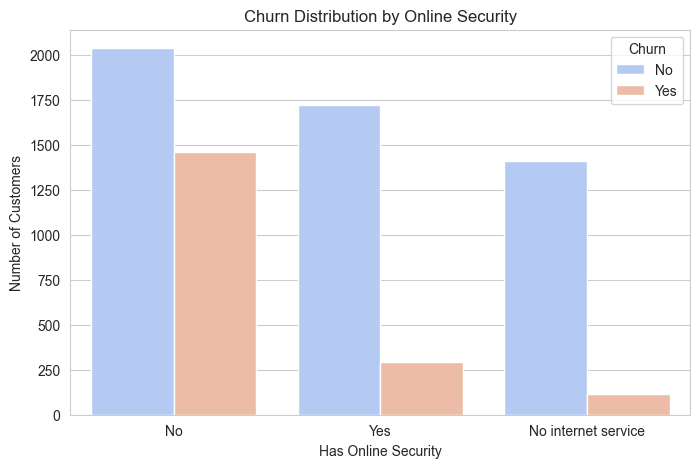

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution by Online Security')
plt.xlabel('Has Online Security')
plt.ylabel('Number of Customers')
plt.show()

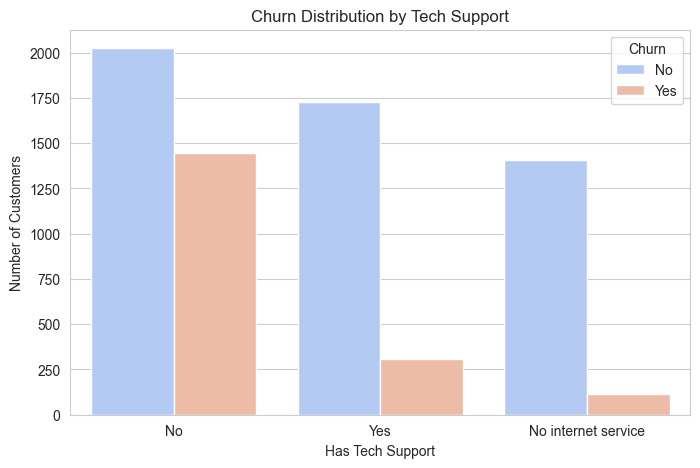

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution by Tech Support')
plt.xlabel('Has Tech Support')
plt.ylabel('Number of Customers')
plt.show()

In [33]:

print("Counts for Online Security vs Churn ")
print(pd.crosstab(df['OnlineSecurity'], df['Churn']))


print("\nCounts for Tech Support vs Churn ")
print(pd.crosstab(df['TechSupport'], df['Churn']))

Counts for Online Security vs Churn 
Churn                  No   Yes
OnlineSecurity                 
No                   2036  1461
No internet service  1407   113
Yes                  1720   295

Counts for Tech Support vs Churn 
Churn                  No   Yes
TechSupport                    
No                   2026  1446
No internet service  1407   113
Yes                  1730   310


In [34]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [36]:
print(" Counts for OnlineBackup vs churn")
print(pd.crosstab(df['OnlineBackup'],df['Churn']))

print(" \n Counts for DeviceProtection vs churn")
print(pd.crosstab(df['DeviceProtection'],df['Churn']))

 Counts for OnlineBackup vs churn
Churn                  No   Yes
OnlineBackup                   
No                   1854  1233
No internet service  1407   113
Yes                  1902   523
 
 Counts for DeviceProtection vs churn
Churn                  No   Yes
DeviceProtection               
No                   1883  1211
No internet service  1407   113
Yes                  1873   545


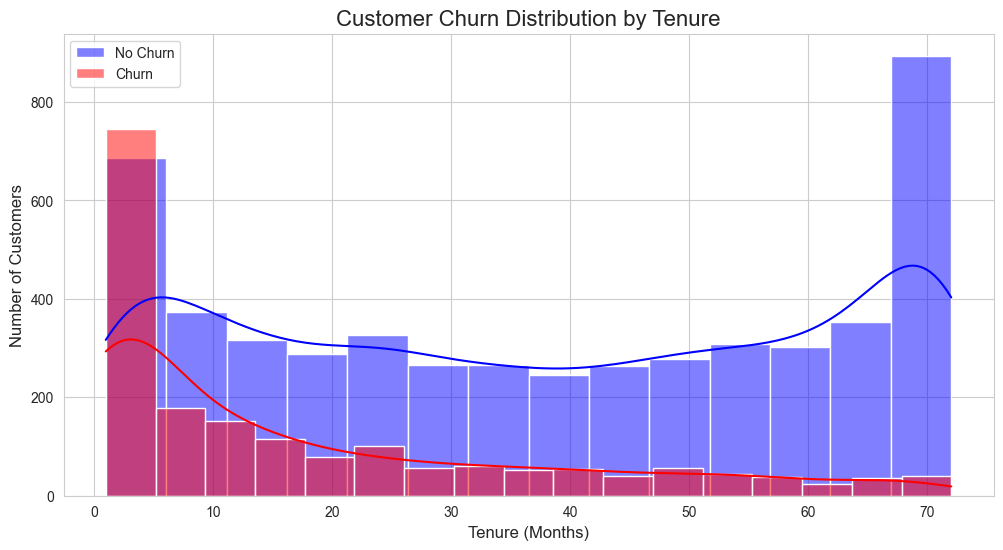

In [37]:
plt.figure(figsize=(12, 6))

sns.histplot(df[df['Churn'] == 'No']['tenure'], color='blue', alpha=0.5, label='No Churn', kde=True)

sns.histplot(df[df['Churn'] == 'Yes']['tenure'], color='red', alpha=0.5, label='Churn', kde=True)

plt.title('Customer Churn Distribution by Tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()